In [104]:
%matplotlib inline

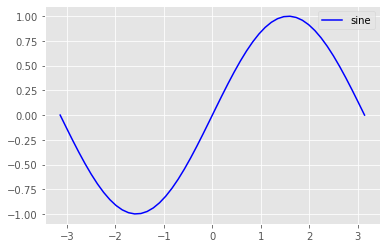

In [105]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-np.pi, np.pi, 50)
y = np.sin(x)
plt.plot(x, y, 'b', label='sine')
plt.legend(loc='best')
plt.show()

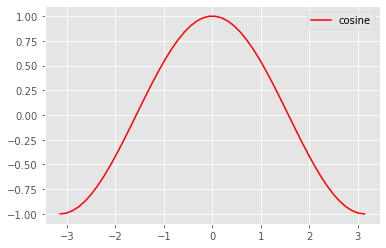

In [106]:
y2 = np.cos(x)
plt.plot(x, y2, 'r', label='cosine')
plt.legend(loc='best')
plt.show()

In [107]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=42)

for k in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=k, p=2, weights='uniform').fit(X_train, y_train)
    print(f'For {k=}: {knn.score(X_test, y_test)=}')


For k=1: knn.score(X_test, y_test)=1.0
For k=3: knn.score(X_test, y_test)=1.0
For k=5: knn.score(X_test, y_test)=1.0
For k=7: knn.score(X_test, y_test)=1.0
For k=9: knn.score(X_test, y_test)=1.0


In [108]:
# To learn more about KNeighborsClassifier
KNeighborsClassifier?

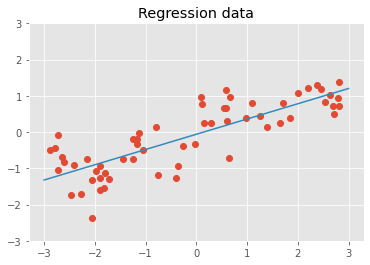

In [109]:
# %load ml02_plot_regression_data.py
import numpy as np
import matplotlib.pyplot as pl
pl.style.use('ggplot')
import data.gen_data as gd
from sklearn.linear_model import LinearRegression


X,y = gd.make_wave(n_samples=60)
lr  = LinearRegression().fit(X,y)
xx  = np.linspace(-3,3).reshape(-1,1)
yy  = lr.predict(xx)


pl.plot(X,y, 'o')
pl.plot(xx,yy)
pl.title('Regression data')
pl.ylim([-3,3])
pl.savefig('fig/02_regression_data.png')
pl.show()


In [110]:
# %load ml02_ols.py
import data.gen_data as gd
X,y = gd.make_wave(n_samples=60)

from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test = split(X,y, random_state=42)

from sklearn.linear_model import LinearRegression
lr           = LinearRegression()

lr.fit(X_train, y_train)
prediction   = lr.predict(X_test)
train_score  = lr.score( X_train, y_train) # 0.67008903150757559 
test_score   = lr.score( X_test,  y_test ) # 0.65933685968637012
print( lr.coef_ )                          # [ 0.39390555]
print( lr.intercept_ )                     # -0.0318043430268
print(train_score, test_score)

print(X.shape)


[0.39390555]
-0.031804343026759746
0.6700890315075756 0.65933685968637
(60, 1)


In [111]:
# %load ml02_ols_boston.py
import data.gen_data as gd
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression

X,y = gd.load_extended_boston()
print(X.shape, y.shape)              # (506, 104) (506,)

X_train, X_test, y_train, y_test = split(X,y, random_state=42)
lr  = LinearRegression().fit(X_train, y_train)

print( lr.score( X_train, y_train) ) # 0.944773345807
print( lr.score( X_test,  y_test ) ) # 0.791206227292


(506, 104) (506,)
0.9448313975211594
0.7758378393351691


In [112]:
# %load ml02_ridge.py
import data.gen_data as gd
from sklearn.model_selection import train_test_split as split

X,y = gd.load_extended_boston()
X_train, X_test, y_train, y_test = split(X,y, random_state=42)

from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print( ridge.score( X_train, y_train) ) # 0.870375195897
print( ridge.score( X_test,  y_test ) ) # 0.814099803185


0.8700969775259919
0.8145421818415556


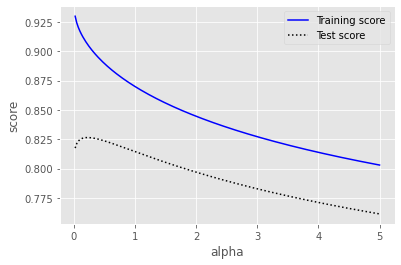

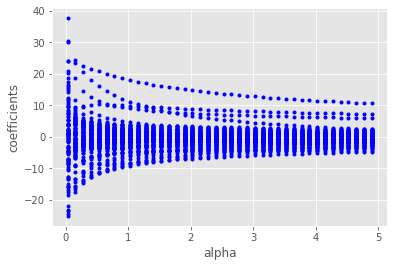

In [113]:
# %load ml02_ridge_alpha.py
import numpy as np
import data.gen_data as gd
from sklearn.model_selection import train_test_split as split

X,y = gd.load_extended_boston()
X_train, X_test, y_train, y_test = split(X,y, random_state=42)

from sklearn.linear_model import Ridge

alphas      = np.linspace(0.025,5, 200)
train_score = [] 
test_score  = [] 
coefs       = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    train_score.append( ridge.score( X_train, y_train) )
    test_score.append ( ridge.score( X_test,  y_test ) )
    coefs.append(ridge.coef_)

import matplotlib.pyplot as pl
pl.style.use('ggplot')
pl.figure(1)
pl.plot( alphas, train_score, 'b-')
pl.plot( alphas, test_score,  'k:')
pl.legend(['Training score', 'Test score'])
pl.xlabel('alpha')
pl.ylabel('score')
pl.savefig('fig/02_ridge_alpha.png')

pl.figure(2)
for a,c in zip(alphas[::5], coefs[::5]):
    pl.plot(a*np.ones_like(c), c, 'b.')
pl.xlabel('alpha')
pl.ylabel('coefficients')
pl.savefig('fig/02_ridge_alpha_2.png')
pl.show()


In [114]:
# %load ml02_lasso.py
import data.gen_data as gd
from sklearn.model_selection import train_test_split as split

X,y = gd.load_extended_boston()
X_train, X_test, y_train, y_test = split(X,y, random_state=42)

from sklearn.linear_model import Lasso
lasso      = Lasso()
lasso.fit(X_train, y_train)

prediction = lasso.predict(X_test)
print( lasso.score( X_train, y_train) ) # 0.267837783695
print( lasso.score( X_test,  y_test ) ) # 0.259923211834


0.26783778369518485
0.2599232118344591


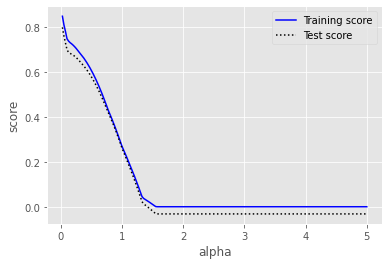

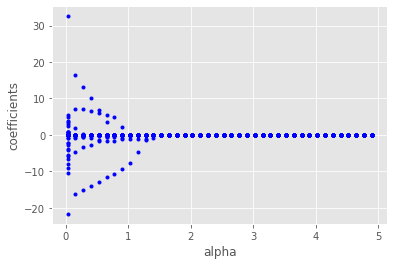

In [115]:
# %load ml02_lasso_alpha.py
import numpy as np
import data.gen_data as gd
from sklearn.model_selection import train_test_split as split

X,y = gd.load_extended_boston()
X_train, X_test, y_train, y_test = split(X,y, random_state=42)

from sklearn.linear_model import Lasso

alphas      = np.linspace(0.025,5, 200)
train_score = [] 
test_score  = [] 
coefs       = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    train_score.append( lasso.score( X_train, y_train) )
    test_score.append ( lasso.score( X_test,  y_test ) )
    coefs.append(lasso.coef_)

import matplotlib.pyplot as pl
pl.style.use('ggplot')
pl.figure(1)
pl.plot( alphas, train_score, 'b-')
pl.plot( alphas, test_score,  'k:')
pl.legend(['Training score', 'Test score'])
pl.xlabel('alpha')
pl.ylabel('score')
pl.savefig('fig/02_lasso_alpha_1.png')

pl.figure(2)
for a,c in zip(alphas[::5], coefs[::5]):
    pl.plot(a*np.ones_like(c), c, 'b.')
pl.xlabel('alpha')
pl.ylabel('coefficients')
pl.savefig('fig/02_lasso_alpha_2.png')
pl.show()


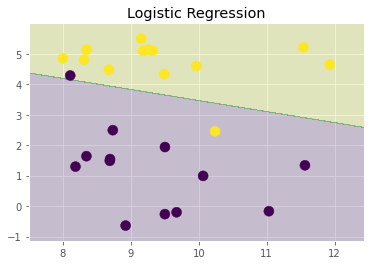

In [116]:
# %load ml02_logistic.py
import numpy as np
import matplotlib.pyplot as pl
import data.gen_data as gd
from sklearn.model_selection import train_test_split as split

def plot_boundary(classifier, X, ax):
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    xx           = np.linspace(x_min, x_max, 1000)
    yy           = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    C_grid = classifier.predict(X_grid)
    C_grid = C_grid.reshape(X1.shape)
    ax.contourf(X1, X2,C_grid, alpha=0.2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    ax.scatter(X[:,0], X[:,1], c=y,s=100, cmap=pl.get_cmap('viridis'))

X,y = gd.make_binary()
X_train, X_test, y_train, y_test = split(X,y, random_state=42)

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression().fit(X_train, y_train)

fig, axes = pl.subplots(1,1)
plot_boundary( logistic, X, axes )
pl.title('Logistic Regression')
pl.savefig('fig/02_logistic.png')
pl.show()


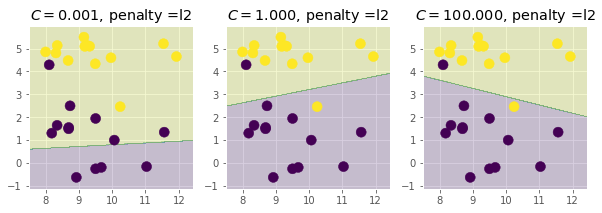

C:\Users\wooihaw\Anaconda3\envs\py39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


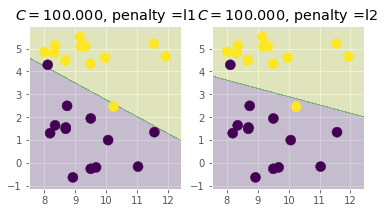

In [117]:
# %load ml02_logistic_C.py
import numpy as np
import matplotlib.pyplot as pl
import data.gen_data as gd
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression

def plot_boundary(classifier, X, ax):
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    xx           = np.linspace(x_min, x_max, 1000)
    yy           = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    C_grid = classifier.predict(X_grid)
    C_grid = C_grid.reshape(X1.shape)
    ax.contourf(X1, X2,C_grid, alpha=0.2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    ax.scatter(X[:,0], X[:,1], c=y,s=100, cmap=pl.get_cmap('viridis'))

X,y = gd.make_binary()
X_train, X_test, y_train, y_test = split(X,y, random_state=42)

fig, axes = pl.subplots(1,3, figsize=(10,3))
for C, ax in zip( [0.001, 1.0, 100], axes):
    classifier = LogisticRegression(solver='liblinear', C=C).fit(X,y)
    plot_boundary(classifier, X, ax=ax)
    ax.set_title(r'$C = %7.3f$, penalty =%s'%(C,'l2'))
    
#pl.savefig('fig/02_logistic_C.png')
pl.show()

fig, axes = pl.subplots(1,2, figsize=(6,3))
for p, ax in zip( ['l1', 'l2'], axes):
    classifier = LogisticRegression(solver='liblinear', C=100.0, penalty=p).fit(X,y)
    plot_boundary(classifier, X, ax=ax)
    ax.set_title(r'$C = %7.3f$, penalty =%s'%(C,p))
    
#pl.savefig('fig/02_logistic_penalty.png')
pl.show()


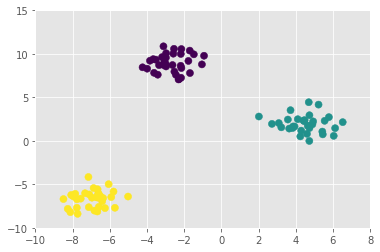

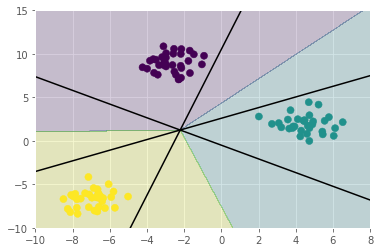

In [118]:
# %load ml02_multiclass.py
import numpy as np
import matplotlib.pyplot as pl
from sklearn.datasets import make_blobs

X, y = make_blobs( random_state=42)
pl.scatter(X[:,0], X[:,1], c=y, s=50)
pl.ylim([-10,15])
pl.xlim([-10, 8])
pl.savefig('fig/02_multiclass.png')
pl.show()


from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X, y)


def plot_boundary(classifier, X, ax):
    x_min, x_max = -10, 8
    y_min, y_max = -10, 15
    xx           = np.linspace(x_min, x_max, 1000)
    yy           = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    C_grid = classifier.predict(X_grid)
    C_grid = C_grid.reshape(X1.shape)
    ax.contourf(X1, X2,C_grid, alpha=0.2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    ax.scatter(X[:,0], X[:,1], c=y,s=50, cmap=pl.get_cmap('viridis'))

x = np.linspace(-10,8)
fig, ax = pl.subplots(1,1)
plot_boundary(model, X, ax)
for coef, intercept,c in zip(model.coef_, model.intercept_, ['k']*3):
    ax.plot(x, -(x*coef[0] + intercept)/coef[1], c)
pl.savefig('fig/02_multiclass_boundary.png')
pl.show()


In [119]:
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from pandas import read_csv

df = read_csv('data/genders_heights_weights.csv')
df

,Gender,Height,Weight
0,Male,187.6,109.7
1,Male,174.7,73.6
2,Male,188.2,96.5
3,Male,182.2,99.8
4,Male,177.5,93.6
...,...,...,...
9995,Female,168.1,62.0
9996,Female,170.4,77.5
9997,Female,162.2,58.3
9998,Female,175.3,74.3


In [120]:
X = df.values[:, 1:]
X

array([[187.6, 109.7],
       [174.7, 73.6],
       [188.2, 96.5],
       ...,
       [162.2, 58.3],
       [175.3, 74.3],
       [157.3, 51.6]], dtype=object)

In [121]:
y = df.values[:, 0]
y

array(['Male', 'Male', 'Male', ..., 'Female', 'Female', 'Female'],
      dtype=object)

In [122]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier().fit(X_train, y_train)
lgr = LogisticRegression().fit(X_train, y_train)

print(f'{knn.score(X_test, y_test)}')
print(f'{lgr.score(X_test, y_test)}')

0.913
0.9226666666666666


In [123]:
try:
    h = float(input('Enter height in cm: '))
    w = float(input('Enter weight in kg: '))
except ValueError:
    print('Not valid value')
else:
    print(f'knn prediction: {knn.predict([[h, w]])}')
    print(f'lgr prediction: {lgr.predict([[h, w]])}')

Enter height in cm: 175
Enter weight in kg: 80
knn prediction: ['Male']
lgr prediction: ['Male']


In [124]:
# Use dataframe instead of np.array for X & y
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier().fit(X_train, y_train)
print(f'{knn.score(X_test, y_test)=}')

knn.score(X_test, y_test)=0.913


In [125]:
# Build regression model to estimate weight based on height
from sklearn.linear_model import LinearRegression

X = df.values[:, 1].reshape(-1, 1)
y = df.values[:, 2]
print(X.shape, y.shape)
X

(10000, 1) (10000,)


array([[187.6],
       [174.7],
       [188.2],
       ...,
       [162.2],
       [175.3],
       [157.3]], dtype=object)

In [126]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
print(f'{lr.score(X_test, y_test)}')

0.8577167230895939


In [127]:
h = float(input('Enter height in cm: '))
print(f'{lr.predict([[h]])}')

Enter height in cm: 180
[88.9122031]


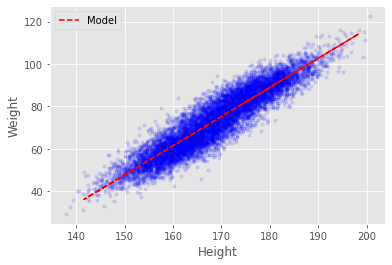

In [128]:
plt.plot(df.values[:, 1], df.values[:, 2], 'b.', alpha=0.1)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.plot(X_test, lr.predict(X_test), 'r--', label='Model')
plt.legend(loc='best')
plt.show()

1.0
0.9370629370629371
[1 0 0 1 1]
1.0
0.9440559440559441
0.9882629107981221
0.951048951048951
0.9741784037558685
0.9440559440559441


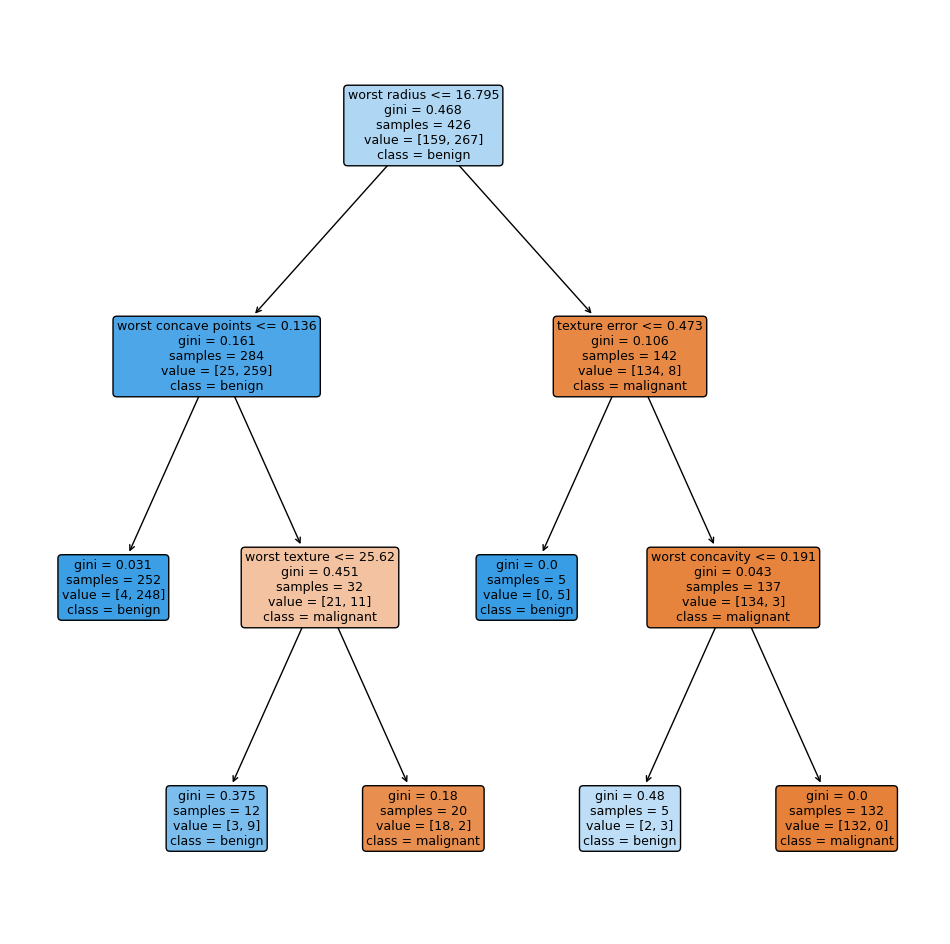

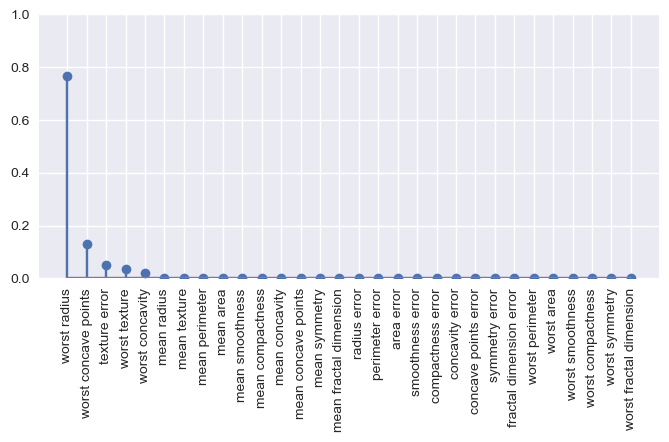

In [133]:
# %load ml02_dt_dtc.py
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split as split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as pl

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
print( dtree.score(X_train, y_train) ) # 1.0
print( dtree.score(X_test, y_test)   ) # 0.937062937063
print( dtree.predict( X_test[0:5])   ) # [1 0 0 1 1]

dtree = DecisionTreeClassifier(random_state=0, criterion='entropy')
dtree.fit(X_train, y_train)
print( dtree.score(X_train, y_train) ) # 1.0
print( dtree.score(X_test, y_test)   ) # 0.944055944056

dtree = DecisionTreeClassifier(random_state=0, max_depth=4)
dtree.fit(X_train, y_train)
print( dtree.score(X_train, y_train) ) # 0.988262910798
print( dtree.score(X_test, y_test)   ) # 0.951048951049

dtree = DecisionTreeClassifier(random_state=0, max_leaf_nodes=6)
dtree.fit(X_train, y_train)
print( dtree.score(X_train, y_train) ) # 0.974178403756
print( dtree.score(X_test, y_test)   ) # 0.944055944056

pl.style.use('default')
pl.figure(figsize=(12, 12))
plot_tree(dtree, feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True, rounded=True)
pl.savefig('fig/02_dt_tree.png')
pl.show()

importance = list(zip(cancer.feature_names, dtree.feature_importances_))
importance.sort(key= lambda x: x[1], reverse=True)
pl.style.use('seaborn')
pl.stem( [x[1] for x in importance] )
pl.xticks( range(len(importance)), [i[0] for i in importance], rotation=90)
pl.ylim([0,1])
pl.gcf().subplots_adjust(bottom=0.4)
pl.savefig('fig/02_dt_importance.png')
pl.show()


In [136]:
# print out the feature importance
importance

[('worst radius', 0.7660832008678777),
 ('worst concave points', 0.12870831199367871),
 ('texture error', 0.05101215564056578),
 ('worst texture', 0.03502603386379235),
 ('worst concavity', 0.019170297634085322),
 ('mean radius', 0.0),
 ('mean texture', 0.0),
 ('mean perimeter', 0.0),
 ('mean area', 0.0),
 ('mean smoothness', 0.0),
 ('mean compactness', 0.0),
 ('mean concavity', 0.0),
 ('mean concave points', 0.0),
 ('mean symmetry', 0.0),
 ('mean fractal dimension', 0.0),
 ('radius error', 0.0),
 ('perimeter error', 0.0),
 ('area error', 0.0),
 ('smoothness error', 0.0),
 ('compactness error', 0.0),
 ('concavity error', 0.0),
 ('concave points error', 0.0),
 ('symmetry error', 0.0),
 ('fractal dimension error', 0.0),
 ('worst perimeter', 0.0),
 ('worst area', 0.0),
 ('worst smoothness', 0.0),
 ('worst compactness', 0.0),
 ('worst symmetry', 0.0),
 ('worst fractal dimension', 0.0)]

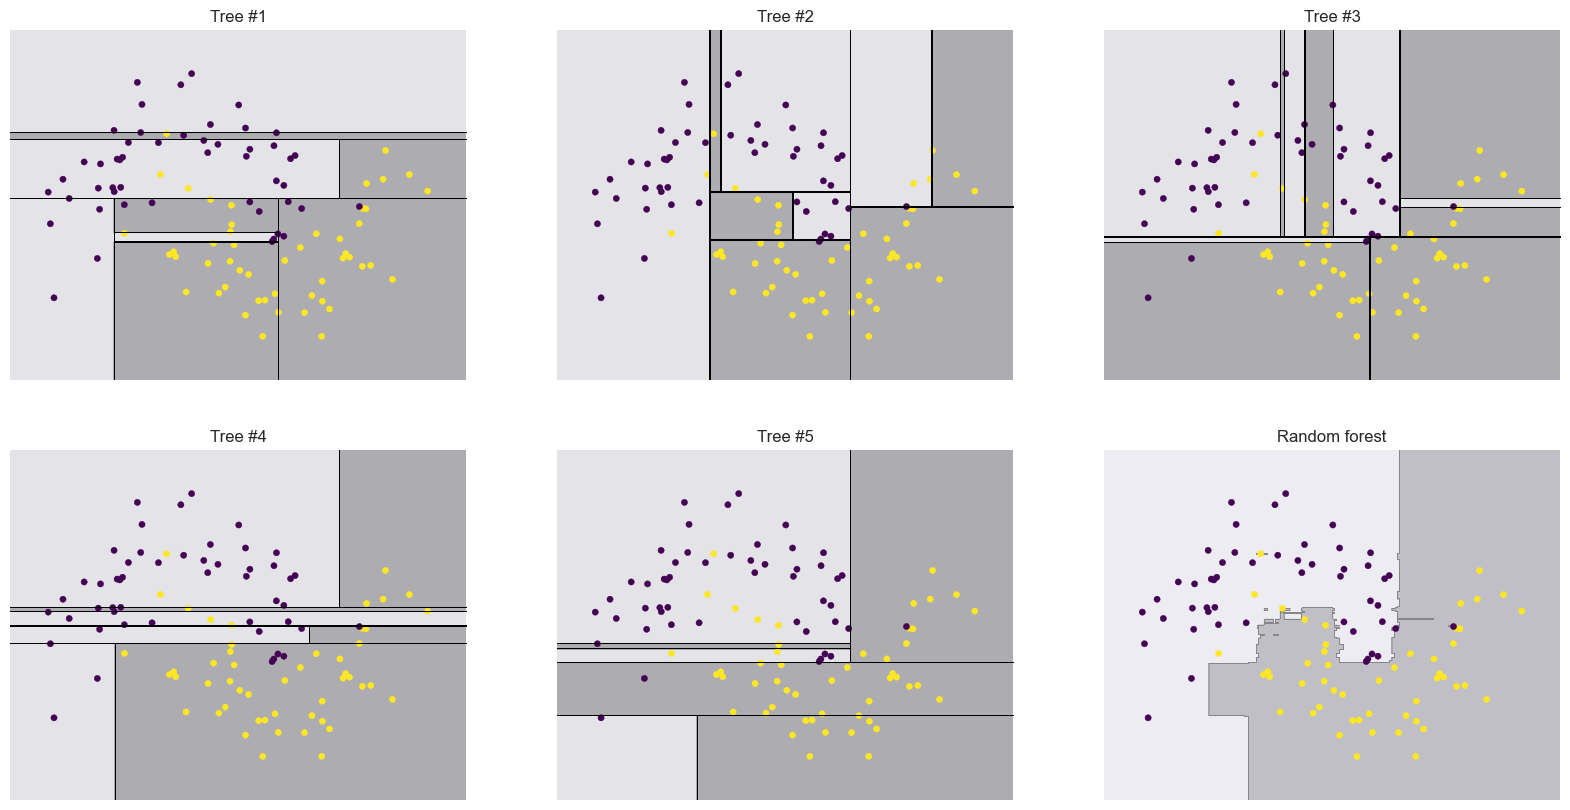

In [138]:
# %load ml02_rf_moon.py
from sklearn.model_selection import train_test_split as split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as pl

def plot_boundary(classifier, X, ax):
    eps          = X.std()/2
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx           = np.linspace(x_min, x_max, 1000)
    yy           = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    C_grid = classifier.predict(X_grid)
    C_grid = C_grid.reshape(X1.shape)
    ax.contourf(X1, X2,C_grid, alpha=0.2)
    ax.set_xlim(x_min, x_max);    ax.set_xticks(()) 
    ax.set_ylim(y_min, y_max);    ax.set_yticks(())

    ax.scatter(X[:,0], X[:,1], c=y,s=20, cmap=pl.get_cmap('viridis'))


def plot_tree_partition(X, y, tree, ax=None):
    eps          = X.std()/2
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx     = np.linspace(x_min, x_max, 1000)
    yy     = np.linspace(y_min, y_max, 1000)
    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]

    Z      = tree.predict(X_grid)
    Z      = Z.reshape(X1.shape)
    faces  = tree.apply(X_grid)
    faces  = faces.reshape(X1.shape)
    border = ndimage.laplace(faces) != 0
    
    ax.contourf(X1, X2, Z, alpha=.4, levels=[0, .5, 1])
    ax.scatter(X[:,0], X[:,1], c=y,s=20, cmap=pl.get_cmap('viridis'))
    ax.plot(X1[border], X2[border], 'k,')

    ax.set_xlim(x_min, x_max);    ax.set_xticks(()) 
    ax.set_ylim(y_min, y_max);    ax.set_yticks(())
    return ax

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = split(X, y,
                                         stratify=y, random_state=42,)
forest = RandomForestClassifier(n_estimators=25, random_state=2)
forest.fit(X_train, y_train)

fig, axes = pl.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate( zip( axes.ravel()[:-1], forest.estimators_) ): 
    plot_tree_partition(X,y, tree, ax)
    ax.set_title('Tree #%d'%(i+1))
plot_boundary( forest, X, axes.ravel()[-1])
axes.ravel()[-1].set_title('Random forest')
pl.savefig('fig/03_rf_boundary.png')
pl.show()


1.0
0.965034965034965
0.9882629107981221
0.965034965034965
0.9906103286384976
0.972027972027972


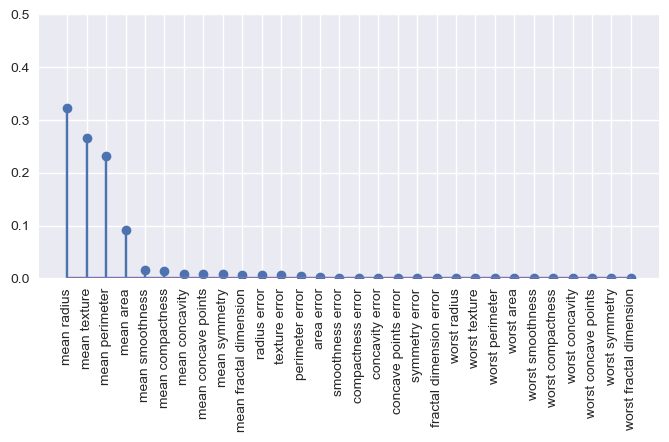

In [140]:
# %load ml02_gbrt.py
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
from sklearn.model_selection import train_test_split as split

X_train, X_test, y_train, y_test = split(cancer.data,
                                         cancer.target,
                                         random_state=0)

from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print( gbrt.score(X_train, y_train) ) # 1.0
print( gbrt.score(X_test,  y_test ) ) # 0.958041958042

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print( gbrt.score(X_train, y_train) ) # 0.988262910798
print( gbrt.score(X_test,  y_test ) ) # 0.965034965035

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print( gbrt.score(X_train, y_train) ) # 0.990610328638
print( gbrt.score(X_test,  y_test ) ) # 0.972027972028

importance = list(zip(cancer.feature_names,
                      gbrt.feature_importances_))
importance.sort(key= lambda x: x[1], reverse=True)

import matplotlib.pyplot as pl
pl.style.use('seaborn')
pl.stem( [x[1] for x in importance] )
pl.xticks( range(len(importance)), cancer.feature_names, rotation=90)
pl.ylim([0,0.5])
pl.gcf().subplots_adjust(bottom=0.4)
pl.savefig('fig/02_gbrt_importance.png')
pl.show()


In [141]:
from sklearn.neural_network import MLPClassifier

In [142]:
# To know more about MLPClassifier
MLPClassifier?